In [1]:
#Imports
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import TensorDataset
import os

In [35]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

#Master dataset
master = torchvision.datasets.ImageFolder('data', transform = transform)

#split indexes
train_size = int(0.6 * len(master))
val_size = int(0.2 *len(master))
test_size = len(master) - val_size - train_size

train_set, val_set, test_set = torch.utils.data.random_split(master, [train_size, val_size, test_size])
print ("Length of training set: {}".format(len(train_set)))
print ("Length of val set: {}".format(len(val_set)))
print ("Length of test set: {}".format(len(test_set)))

Length of training set: 2349
Length of val set: 783
Length of test set: 784


In [16]:
def display_data (data_loader):
    '''
    Displays a few images to see if our data loaded properly
    
    data_loader: torch data_loader
    data_type: a string to show which data is displayed
    '''

    classes = ['N/A','Mask', 'No Mask']

    data = iter(data_loader)
    image, label = data.next()
    images = image.numpy() 
    
    k = 0
    for k in range(32):

      if k > 14:
            break

      image = images[k]
      # #place the colour channel at the end, instead of at the beginning
      img = np.transpose(image, [1,2,0])

      ax = plt.subplot(3, 5, k+1)
      plt.axis('off')
      plt.imshow(img)

      #Label each image with the proper letter
      ax.set_title(classes[label[k]])
    return images

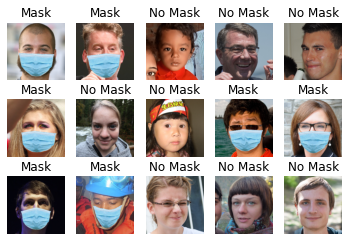

In [30]:
train_data = torch.utils.data.DataLoader(train_set, batch_size=2349, num_workers=1, shuffle=True)
images = display_data(train_data)

In [33]:
#batch size?
data = images.reshape(len(images), -1)
print(len(images))

2349


In [34]:
#There are 150528 features in each image because: 224 *224 * 3(RGB channels) = 150528

print(len(data[0]))

150528


In [51]:
label=[] #y

for i, l in train_data:

    label = l.tolist()

In [52]:
print(label)

[1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 

In [53]:
print(len(label))

2349


In [36]:
classifier = svm.SVC(gamma=0.001)

In [54]:
X_train = data
y_train = label

classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [ ]:
# test_data = torch.utils.data.DataLoader(test_set, batch_size=784, num_workers=1, shuffle=True)
# test_images = display_data(test_data)

# new_test_data = test_images.reshape(len(test_images), -1)

# test_label=[] #y

# for i, l in test_data:

#     test_label = l.tolist()

# X_test = new_test_data

# predicted = classifier.predict(X_test)

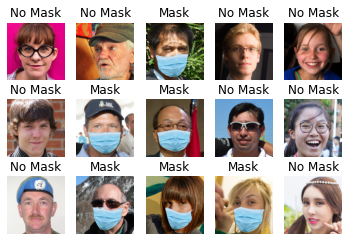

In [55]:
test_data = torch.utils.data.DataLoader(test_set, batch_size=784, num_workers=1, shuffle=True)
test_images = display_data(test_data)

In [58]:
new_test_data = test_images.reshape(len(test_images), -1)

784


In [59]:
test_label=[] #y

for i, l in test_data:

    test_label = l.tolist()

In [63]:
X_test = new_test_data

predicted = classifier.predict(X_test)

In [64]:
print("Accuracy:",metrics.accuracy_score(test_label, predicted))

Accuracy: 0.5153061224489796
